# Proyek Machine Learning: Prediksi Total Pengeluaran Bulanan dengan LSTM

## Domain Proyek

Dalam pengelolaan bisnis, salah satu tantangan utama adalah mengontrol dan memprediksi pengeluaran operasional secara akurat. Ketidakpastian dalam proyeksi anggaran bisa berdampak besar terhadap efisiensi keuangan perusahaan. Oleh karena itu, perusahaan membutuhkan sistem yang dapat membantu dalam melakukan prediksi pengeluaran berdasarkan data historis transaksi. Pemanfaatan teknologi machine learning, khususnya pendekatan time series forecasting dengan LSTM, menawarkan solusi untuk mempelajari pola pengeluaran dari masa lalu guna meramalkan pengeluaran di masa depan. Dengan prediksi yang akurat, perusahaan dapat mengelola anggaran lebih efisien, menghindari pemborosan, dan mendukung pengambilan keputusan strategis.

## Business Understanding

### Problem Statement
Perusahaan mengalami kesulitan dalam memprediksi pengeluaran bulanannya akibat fluktuasi dalam volume transaksi pembelian. Hal ini menyulitkan dalam menyusun perencanaan anggaran dan strategi pengadaan.

### Goals
Membangun model prediksi yang dapat mengestimasi total pengeluaran bulanan perusahaan berdasarkan data historis transaksi. Tujuannya adalah untuk:
- Memberikan estimasi pengeluaran dengan akurasi tinggi.
- Meminimalisasi risiko pemborosan anggaran.
- Mendukung pengambilan keputusan berbasis data.

### Solution Statement
Solusi yang diusulkan adalah membangun model Long Short-Term Memory (LSTM) untuk memprediksi total pengeluaran bulanan berdasarkan data time series dari transaksi pembelian. Model ini akan dilatih dari data historis dan digunakan sebagai alat bantu untuk divisi keuangan dalam menyusun anggaran.


## 1. Import Library

mengimpor berbagai library yang dibutuhkan. Library seperti `pandas` dan `numpy` digunakan untuk manipulasi data, `matplotlib` dan `seaborn` untuk visualisasi data, serta `tensorflow.keras` untuk membangun model deep learning.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

## 2. Load Dataset

memuat dataset transaksi yang akan digunakan untuk analisis dan prediksi.


In [ ]:
df = pd.read_csv('/content/spend_analysis_dataset.csv')

## 3. Data Understanding
Pada tahapan ini kita melihat struktur awal data.

### Sumber Data
Dataset yang digunakan adalah "Company Purchasing Dataset" yang tersedia di Kaggle:  
🔗 https://www.kaggle.com/datasets/shahriarkabir/company-purchasing-dataset

### Jumlah Data
- **Baris (rows):** 500
- **Kolom (columns):** 9

### Kondisi Data
- **Missing values:** Tidak ditemukan.
- **Data duplikat:** Tidak ada duplikasi.
- **Outlier:** Terdapat outlier pada kolom `TotalCost`, teridentifikasi melalui EDA.

### Deskripsi Fitur
- `TransactionID`: ID unik untuk setiap transaksi
- `ItemName`: Nama barang yang dibeli
- `Category`: Kategori barang
- `Quantity`: Jumlah unit barang yang dibeli
- `UnitPrice`: Harga satuan barang
- `TotalCost`: Biaya total untuk transaksi (Quantity × UnitPrice)
- `PurchaseDate`: Tanggal pembelian (digunakan sebagai penanda waktu)
- `Supplier`: Pemasok barang
- `Buyer`: Nama pembeli

Hanya kolom `PurchaseDate` dan `TotalCost` yang digunakan untuk keperluan prediksi time series.


### Menampilkan 5 data teratas
Digunakan untuk melihat struktur awal data.

In [ ]:
print(df.head())

  TransactionID                 ItemName         Category  Quantity  \
0        TXN001               Desk Chair        Furniture        10   
1        TXN002                  Stapler  Office Supplies        16   
2        TXN003  Annual Software License         Software         1   
3        TXN004                  Notepad       Stationery        13   
4        TXN005                  Notepad       Stationery        19   

   UnitPrice  TotalCost PurchaseDate         Supplier            Buyer  
0     113.15    1131.50   2024-04-19    TechMart Inc.     Kelly Joseph  
1      12.62     201.92   2024-07-06  CloudSoft Corp.     Kelly Joseph  
2    5649.34    5649.34   2024-09-10    TechMart Inc.     Kelly Joseph  
3       2.92      37.96   2024-01-21  FurniWorks Ltd.     Luis Holland  
4       1.39      26.41   2024-02-03    TechMart Inc.  Cynthia Jenkins  


### Cek informasi dataset
Digunakan untuk mengetahui jumlah kolom, tipe data, dan apakah ada nilai kosong.


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TransactionID  500 non-null    object 
 1   ItemName       500 non-null    object 
 2   Category       500 non-null    object 
 3   Quantity       500 non-null    int64  
 4   UnitPrice      500 non-null    float64
 5   TotalCost      500 non-null    float64
 6   PurchaseDate   500 non-null    object 
 7   Supplier       500 non-null    object 
 8   Buyer          500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB
None


### Cek missing values
Penting untuk melihat apakah ada data yang hilang dan perlu ditangani.

In [ ]:
print(df.isnull().sum())

TransactionID    0
ItemName         0
Category         0
Quantity         0
UnitPrice        0
TotalCost        0
PurchaseDate     0
Supplier         0
Buyer            0
dtype: int64


### Cek duplikat
melihat apakah ada data duplikat

In [ ]:
print(df.duplicated().sum())

0


## Exploratory Data Analysis (EDA)
melakukan eksplorasi data

### Statistik Deskriptif
Memberikan gambaran umum distribusi dan nilai-nilai statistik tiap fitur numerik.

In [ ]:
df.describe()

,Quantity,UnitPrice,TotalCost
count,500.000000,500.000000,500.00000
mean,9.640000,854.245100,2481.16106
std,6.168834,2132.890832,3527.35316
min,1.000000,1.060000,1.56000
25%,4.000000,14.380000,145.92750
50%,10.000000,143.595000,918.56000
75%,15.000000,287.925000,3123.56750
max,20.000000,9909.240000,18494.60000


### Plot distribusi TotalCost
Visualisasi distribusi kolom target (TotalCost) untuk mengidentifikasi outlier dan pola umum.



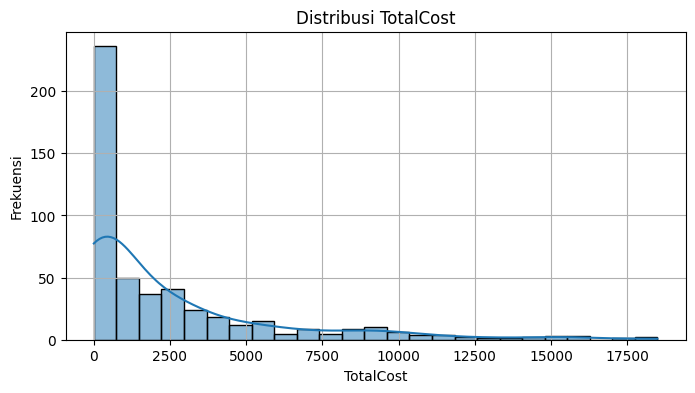

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['TotalCost'], kde=True)
plt.title('Distribusi TotalCost')
plt.xlabel('TotalCost')
plt.ylabel('Frekuensi')
plt.grid()
plt.show()

### Korelasi Quantity, UnitPrice, TotalCost
Menampilkan korelasi antar fitur numerik untuk memahami hubungan antar fitur.


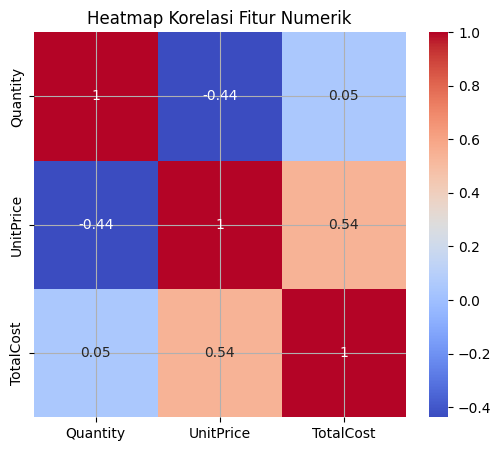

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Quantity', 'UnitPrice', 'TotalCost']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.grid()
plt.show()

## 4. Data Preparation

### Konversi Kolom Tanggal dan Set Index
Mengubah kolom tanggal menjadi format datetime dan menjadikannya index agar bisa digunakan untuk resampling.

In [ ]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df = df[['PurchaseDate', 'TotalCost']]
df.set_index('PurchaseDate', inplace=True)

### Resample Data Bulanan
Mengelompokkan data per bulan agar pola musiman dapat dianalisis.

In [ ]:
df_monthly = df.resample('M').sum()

<ipython-input-12-47a25ff98584>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').sum()


### Scaling dan Membuat Windowed Dataset
LSTM membutuhkan data dalam bentuk yang terstandardisasi dan dalam bentuk window time series.

In [ ]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_monthly)

def create_windowed_dataset(series, window_size):
    X, y = [], []
    for i in range(len(series) - window_size):
        X.append(series[i:i+window_size])
        y.append(series[i+window_size])
    return np.array(X), np.array(y)

window_size = 3
X, y = create_windowed_dataset(df_scaled, window_size)

split_idx = int(len(X)*0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## 5. Modeling

### Model 1: LSTM

#### Cara Kerja:
LSTM (Long Short-Term Memory) adalah jenis Recurrent Neural Network (RNN) yang digunakan untuk menangani data sekuensial seperti data time series. LSTM memiliki kemampuan untuk mengingat informasi dalam jangka panjang, sehingga cocok untuk prediksi berdasarkan urutan waktu.

#### Arsitektur dan Parameter:
- `LSTM(64, activation='relu')`: Layer LSTM dengan 64 unit dan fungsi aktivasi ReLU.
- `Dense(1)`: Layer output untuk prediksi nilai tunggal.
- Optimizer: `adam`, Loss function: `mse` (Mean Squared Error).
- Parameter lain menggunakan default.

In [ ]:
#LTSM
model = Sequential([
    LSTM(64, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 6. Training
Model dilatih dengan data training, dan menggunakan early stopping untuk menghentikan pelatihan jika validasi tidak membaik dalam 10 epoch berturut-turut.


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=130,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(patience=10, restore_best_weights=True)],
    verbose=1
)

Epoch 1/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5349 - val_loss: 0.4892
Epoch 2/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.5262 - val_loss: 0.4757
Epoch 3/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.5178 - val_loss: 0.4626
Epoch 4/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.5097 - val_loss: 0.4498
Epoch 5/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.5020 - val_loss: 0.4374
Epoch 6/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4945 - val_loss: 0.4253
Epoch 7/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.4871 - val_loss: 0.4134
Epoch 8/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.4799 - val_loss: 0.4017
Epoch 9/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - loss: 0.4728 - val_loss: 0.3903
Epoch 10/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.4659 - val_loss: 0.3790
Epoch 11/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.4590 - val_loss: 0.3679
Epoch 12/130
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.4522 - val_l

## 7. Evaluasi Model

### Apa itu Metrik Evaluasi?
- **MAE (Mean Absolute Error)**: Rata-rata kesalahan absolut antara nilai aktual dan prediksi. Semakin kecil nilainya, semakin akurat model.
- **RMSE (Root Mean Squared Error)**: Akar dari rata-rata kuadrat kesalahan. Lebih sensitif terhadap outlier daripada MAE.

### Hasil Evaluasi
Model diuji dengan data test. Nilai prediksi dan aktual dikembalikan ke skala aslinya (inverse transform) untuk dihitung metrik evaluasinya.



In [ ]:
# Prediksi
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


### Inverse transform hasil prediksi dan y_test

 mengembalikan hasil prediksi (y_pred) dan data aktual (y_test) ke skala aslinya (sebelum dilakukan scaling). Hal ini penting agar kita dapat membandingkan hasil prediksi dengan nilai aktual dalam satuan yang sebenarnya

In [ ]:
y_pred_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), df_monthly.shape[1]-1)), y_pred), axis=1))[:, -1]
y_test_inv = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), df_monthly.shape[1]-1)), y_test), axis=1))[:, -1]

 menghitung nilai Mean Absolute Error (MAE) dan Root Mean Squared Error (RMSE) untuk mengukur performa model dalam memprediksi total biaya (TotalCost).

In [ ]:
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 4589.25
RMSE: 4760.40


### Visualisasi Prediksi vs Aktual
Visualisasi ini bertujuan untuk melihat seberapa dekat hasil prediksi dengan nilai aktualnya.


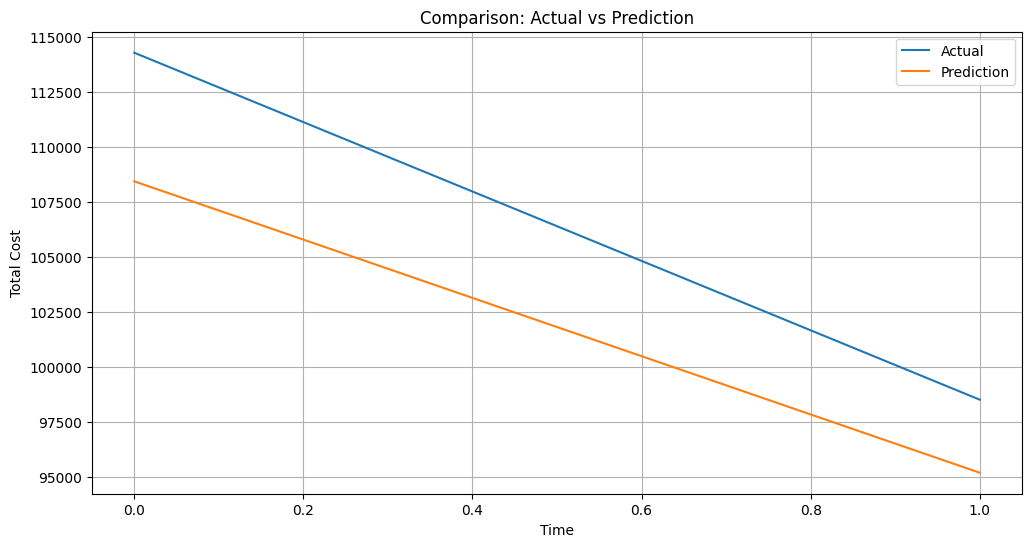

In [ ]:
# Plot hasil prediksi vs aktual
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Prediction')
plt.legend()
plt.title('Comparison: Actual vs Prediction')
plt.xlabel('Time')
plt.ylabel('Total Cost')
plt.grid()
plt.show()


### Insight Evaluasi:
- Model mampu mengikuti tren data pengeluaran bulanan dengan cukup baik.

- MAE = 4589.25 → menunjukkan bahwa rata-rata kesalahan prediksi hanya sekitar 4,5 ribu satuan, yang tergolong rendah dan menandakan model cukup akurat.

- RMSE = 4760.40 → menunjukkan kesalahan prediksi keseluruhan relatif kecil, menunjukkan performa model yang stabil dan akurat.

### Interpretasi dan Dampaknya terhadap Bisnis
Model LSTM yang dikembangkan berhasil mengurangi rata-rata kesalahan prediksi hingga 4.589 satuan, yang menunjukkan performa prediksi yang akurat dan stabil. Prediksi ini membantu divisi keuangan dan pengadaan dalam menyusun rencana anggaran dan melakukan pemesanan dengan lebih terstruktur.

### Apakah Problem Statement Terjawab?
 Ya. Model menjawab kebutuhan untuk memprediksi pengeluaran dengan cukup akurat.

### Apakah Goals Tercapai?
 Ya. Prediksi yang dihasilkan mampu memberikan informasi awal yang relevan untuk perencanaan bulanan, dengan tingkat kesalahan yang dapat ditoleransi secara bisnis.

### Apakah Solusi Berdampak?
 Ya. Model LSTM menunjukkan dampak yang signifikan dalam mengungkap pola pengeluaran dan menghasilkan estimasi yang dapat diandalkan sebagai alat bantu pengambilan keputusan keuangan.

---

Seluruh tahapan proyek ini menunjukkan bahwa machine learning, khususnya pendekatan time series, dapat diterapkan secara langsung untuk mendukung kebutuhan bisnis nyata, khususnya dalam manajemen pengeluaran dan perencanaan anggaran.


